In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

print(pd.__version__)

1.3.4


# 1. Biểu đồ điểm/đường

In [2]:
a = np.array([3,1,3,4,5,2,6,5,8,3,9,1])
sa = pd.Series(a)
sa

0     3
1     1
2     3
3     4
4     5
5     2
6     6
7     5
8     8
9     3
10    9
11    1
dtype: int32

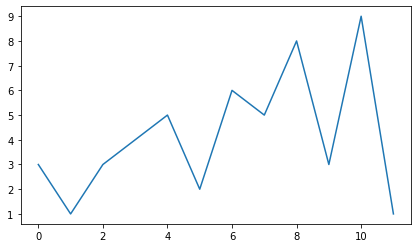

In [3]:
fig = plt.figure(figsize=(7,4))

sa.plot()

plt.show()
plt.close("all")

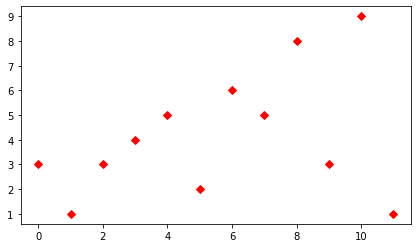

In [4]:
fig = plt.figure(figsize=(7,4))
sa.plot(linestyle='' , marker='D', color='red')
plt.show()
plt.close("all")

**Vẽ trên các subplot**

In [5]:
b = np.random.randint(4, 10, size=(10,3))
df_b = pd.DataFrame(b, index=range(1,11), columns=list('ABC'))
df_b

,A,B,C
1,7,6,7
2,9,4,4
3,4,7,6
4,4,8,9
5,6,8,4
6,6,4,5
7,8,9,9
8,8,6,4
9,8,5,7
10,4,7,9


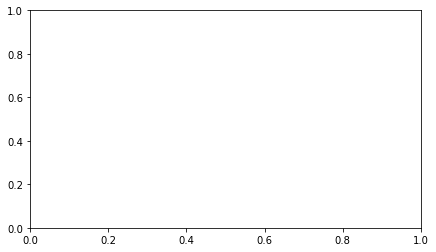

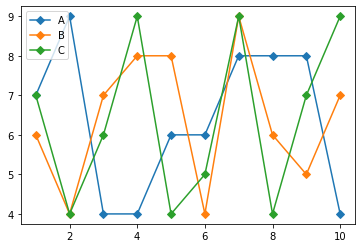

In [6]:
# Nếu không xác định tham số ax
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot()

df_b.plot(linestyle='-' , marker='D')

plt.show()
plt.close("all")

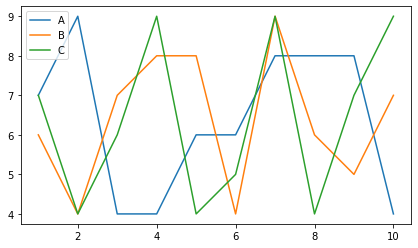

In [7]:
# Khi xác định tham số ax
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot()

df_b.plot(ax=ax)

plt.show()
plt.close("all")

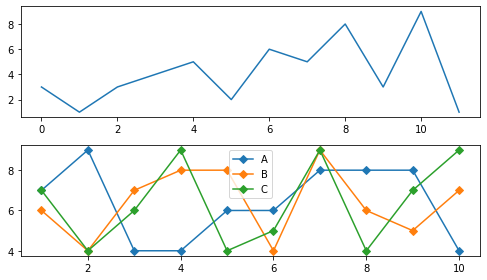

In [8]:
# Thử lại với 2 subplot khác nhau
fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sa.plot(ax=ax1)
df_b.plot(ax=ax2, linestyle='-' , marker='D')

plt.tight_layout()
plt.show()
plt.close("all")

**Vẽ nhanh mỗi cột trên 1 subplot**

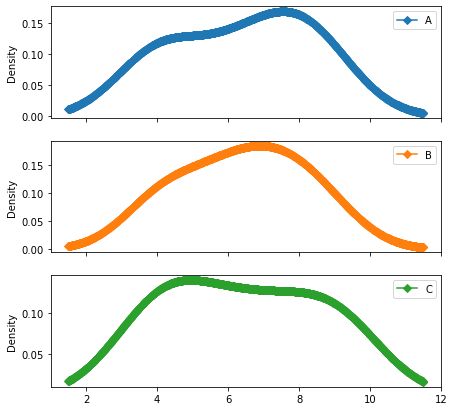

In [9]:
df_b.plot(subplots=True, linestyle='-' , kind='kde', marker='D', sharex=True, figsize=(7,7))
plt.show()
plt.close("all")

# 2. Biểu đồ cột và histogram

## 2.1. Biểu đồ cột: `bar` và `barh`

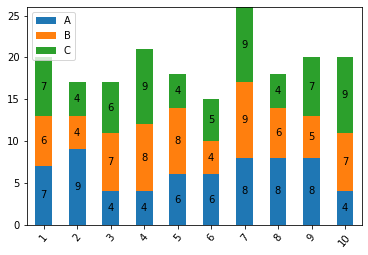

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
df_b.plot.bar(ax=ax, stacked=True, legend='reverse', rot=50)

ax.bar_label(container = ax.containers[0], label_type='center')
ax.bar_label(container = ax.containers[1], label_type='center')
ax.bar_label(container = ax.containers[2], label_type='center')

ax.set_ylim([0,26])
#ax.set_xlim([0,11])
plt.legend(loc='upper left')
plt.show()
plt.close("all")

In [ ]:
# Nếu không dùng stack?


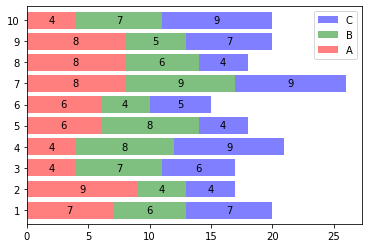

In [11]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
df_b.plot.barh(ax=ax, stacked=True, legend='reverse', rot=0, 
               width=0.8, color=['r', 'g', 'b'], alpha=0.5)

ax.bar_label(container = ax.containers[0], label_type='center')
ax.bar_label(container = ax.containers[1], label_type='center')
ax.bar_label(container = ax.containers[2], label_type='center')

plt.show()
plt.close("all")

**Có thể chọn tham số 'kind' trong hàm 'plot'** <br>
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot (DataFrame only)
- 'hexbin' : hexbin plot (DataFrame only)

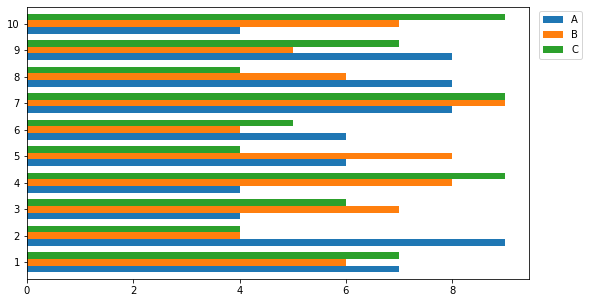

In [12]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

df_b.plot(ax=ax, legend='reverse', width=0.75, kind='barh')

ax.legend(loc=[1.02,0.81])

plt.show()
plt.close("all")

**Vẽ nhanh các subplots trên các cột hoặc dòng**

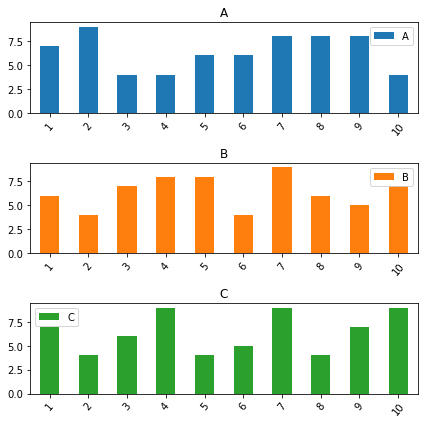

In [13]:
df_b.plot.bar(subplots=True, sharex=False, sharey=True, rot=50, figsize=(6,6))

plt.tight_layout()
plt.show()
plt.close("all")

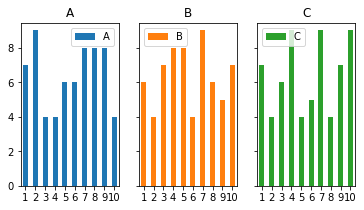

In [14]:
# Set tham số layout=(1,3) để tạo ra 1 dòng và 3 cột
df_b.plot.bar(subplots=True, layout=(1,3), sharex=False, sharey=True, rot=0, figsize=(6,3))
plt.show()
plt.close("all")

## 2.2. Biểu đồ Histogram

In [15]:
c = np.random.normal(10, 3, size=(500,4))
df_c = pd.DataFrame(c, columns=list('ABCD'))
df_c.tail()

,A,B,C,D
495,12.476283,11.496739,8.842140,11.520182
496,9.344886,11.291023,8.685378,9.159202
497,13.518555,11.775204,6.739929,5.962677
498,10.570671,4.946943,11.629615,8.030248
499,10.473470,8.283145,10.129462,11.354314


In [16]:
df_c.head()

,A,B,C,D
0,14.984139,8.062706,14.334533,9.754272
1,8.745512,11.759590,9.273816,4.378417
2,11.724813,9.427291,8.812754,11.447280
3,6.900741,8.464453,11.636643,8.042701
4,14.078421,12.736648,8.189186,8.955475


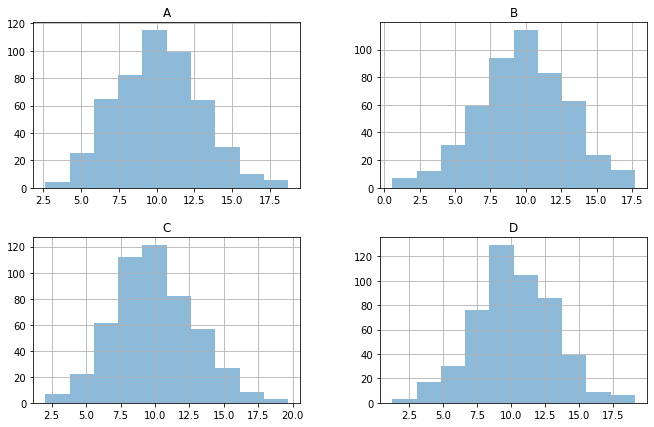

In [17]:
df_c.hist(alpha=0.5, figsize=(11,7))
plt.show()
plt.close("all")

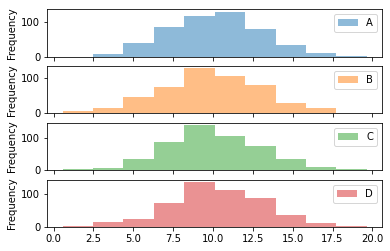

In [18]:
df_c.plot.hist(subplots=True, rot=0, alpha=0.5)
plt.show()
plt.close("all")

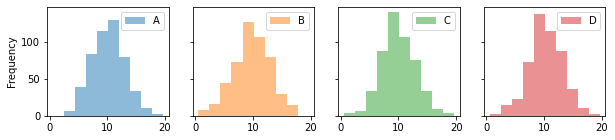

In [19]:
df_c.plot.hist(subplots=True, layout=(1,4), rot=0, alpha=0.5, figsize=(10,2), sharey=True)
plt.show()
plt.close("all")

**Có thể xếp chồng nhiều histogram**

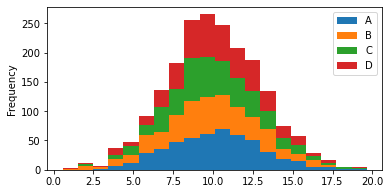

In [20]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot()
df_c.plot.hist(ax=ax, stacked=True, bins=20, rot=0)
plt.show()
plt.close("all")

**Histogram dạng mật độ (kde)**

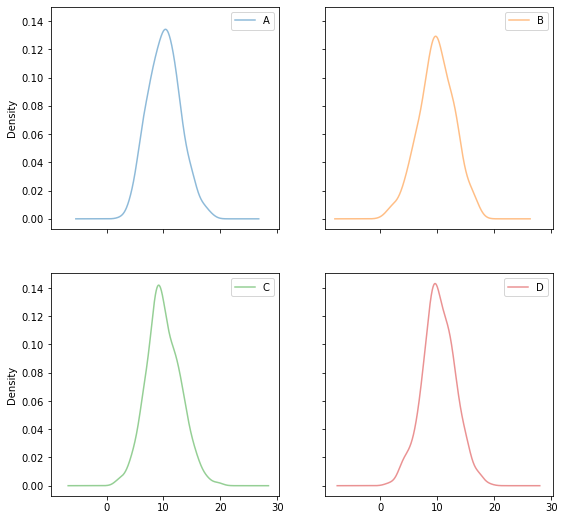

In [21]:
df_c.plot(kind='kde', subplots=True, layout=(2,2), rot=0, alpha=0.5, 
               figsize=(9,9), sharey=True)
plt.show()
plt.close("all")

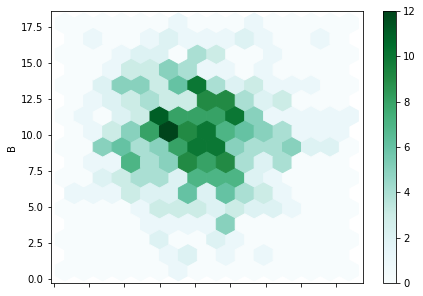

In [23]:
df_c.plot.hexbin(x='A', y='B', figsize=(7,5), gridsize=15)
plt.show()
plt.close('all')

# 3. Biểu đồ scatter

In [ ]:
# df_c.plot.scatter

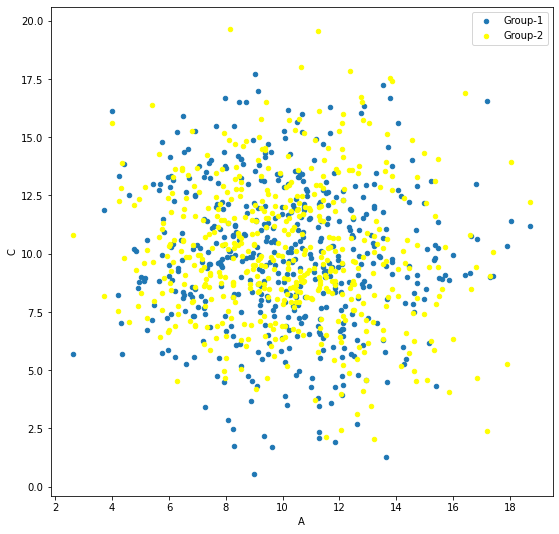

In [22]:
ax1 = df_c.plot.scatter(x='A', y='B', figsize=(9,9), label='Group-1')
df_c.plot.scatter(x='A', y='C', ax=ax1, color="yellow", label='Group-2')
plt.legend(loc='upper right')
plt.show()
plt.close('all')

# 4. Biểu đồ tròn

In [24]:
df_c[0:4]

,A,B,C,D
0,14.984139,8.062706,14.334533,9.754272
1,8.745512,11.759590,9.273816,4.378417
2,11.724813,9.427291,8.812754,11.447280
3,6.900741,8.464453,11.636643,8.042701


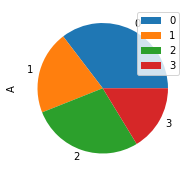

In [25]:
df_c[0:4].plot.pie(y='A', figsize=(3,3))
plt.show()

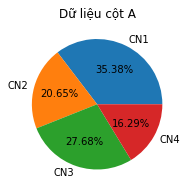

In [26]:
df_c[0:4].plot.pie(y='A', figsize=(3,3), labels=['CN1', 'CN2', 'CN3', 'CN4'], 
                   autopct='%.2f%%',  legend=False, title='Dữ liệu cột A', ylabel='')
plt.show()

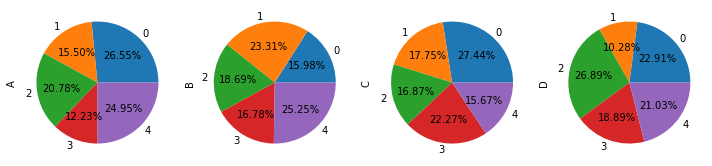

In [27]:
# Vẽ nhanh các cột trên subplots
df_c[0:5].plot.pie(subplots=True, figsize=(10,8), legend=False, autopct='%.2f%%')
plt.tight_layout()
plt.show()

**Biểu đồ dạng quạt**

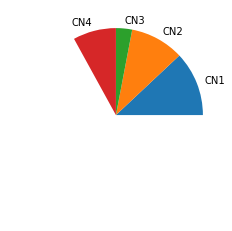

In [28]:
# Vẽ quạt với Series các giá trị có tổng < 1.0
sc = pd.Series([0.12, 0.1, 0.03, 0.08])
sc.plot.pie(labels=['CN1', 'CN2', 'CN3', 'CN4'], ylabel='', normalize=False)
plt.show()

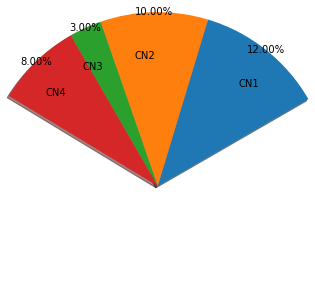

In [29]:
# Chỉnh sửa góc bắt đầu với startangle
sc = pd.Series([0.12, 0.1, 0.03, 0.08])
sc.plot.pie(labels=['CN1', 'CN2', 'CN3', 'CN4'], ylabel='', radius=2.0,
            labeldistance=0.75, pctdistance= 1.0, autopct='%.2f%%',
            shadow = True, 
            startangle=30, 
            normalize=False,
           )
plt.show()

## 2.5. Vẽ biểu đồ với table

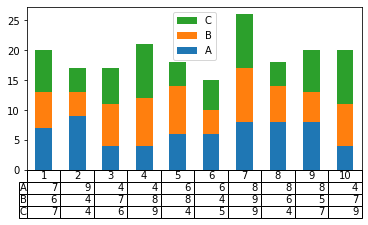

In [30]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot()
df_b.plot.bar(ax=ax, stacked=True, legend='reverse', table=True)
plt.xticks([])
plt.show()
plt.close("all")

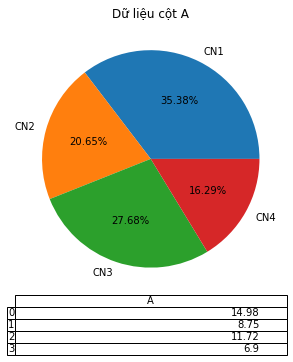

In [31]:
# Thử với biểu đồ tròn
df_c[0:4].plot.pie(y='A', figsize=(5,5), labels=['CN1', 'CN2', 'CN3', 'CN4'], 
                   autopct='%.2f%%',  legend=False, title='Dữ liệu cột A', ylabel='',
                   table=np.round(df_c[0:4]['A'],2))
plt.show()
plt.close("all")

In [ ]:
np.round(df_c[0:4]['A'].T,2)